In [1]:
import time
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

# Load the dataset

In [2]:
X, y = load_svmlight_file(f="housing_scale.txt", n_features=13)

# Preprocess the dataset

$$
X =
\left(
\begin{array}{c}
x_1^T;1\\
x_2^T;1\\
\vdots\\
x_n^T;1
\end{array}
\right)
$$

$$
y = 
\left(
\begin{array}{c}
y_1\\
y_2\\
\vdots\\
y_n
\end{array}
\right)
$$

In [3]:
X = X.toarray()
n_samples, n_features = X.shape
X = np.column_stack((X, np.ones((n_samples, 1))))
y = y.reshape((-1, 1))

# Devide the dataset into traning set and validation set

In [4]:
TEST_SIZE = 0.25
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE)

# Initialize parameter $w$ to zeros

$$ \hat{w} = (w;b)^T $$

In [5]:
w = np.zeros((n_features + 1, 1)) 

# Linear regression with gradient descent

## Regularized loss function

$$ L(w) = \frac{\lambda}{2}{\left|\left|w\right|\right|}^2 + \frac{1}{2}{\left|\left|y - Xw\right|\right|}^2 $$

## Vectorized loss function

$$ L(w) = \frac{\lambda}{2}\hat{w}^T\hat{w} + \frac{1}{2}(y - X\hat{w})^T(y-X\hat{w}) $$

## Derivation of gradient descent

$$ \hat{w} = \mathop{\arg\min}_{\hat{w}}L(w) $$

$$ \frac{\partial L(w)}{\partial w} =  \lambda\hat{w} + X^T(X\hat{w} - y)$$

$$ \hat{w} \to \hat{w} - \eta\frac{\partial L(w)}{\partial w} $$

## Use RMSE for loss evaluation

$$ Loss = RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y\_pred^{(i)} - y\_true^{(i)})^2} $$

## GD solution

### Hyper-parameters

In [6]:
PENALTY_FACTOR = 0.5
LEARNING_RATE = 0.0005
MAX_EPOCH = 300

In [7]:
losses_train = []
losses_val = []

for epoch in range(MAX_EPOCH):
    grad = PENALTY_FACTOR * w + X_train.T @ (X_train @ w - y_train)
    grad = -grad
    w = w + LEARNING_RATE * grad 

    y_pred = np.dot(X_train, w)
    loss_train = np.sqrt(((y_pred - y_train) ** 2).mean())
    losses_train.append(loss_train)

    y_pred = np.dot(X_val, w) 
    loss_val = np.sqrt(((y_pred - y_val) ** 2).mean())
    losses_val.append(loss_val)

### Loss plot

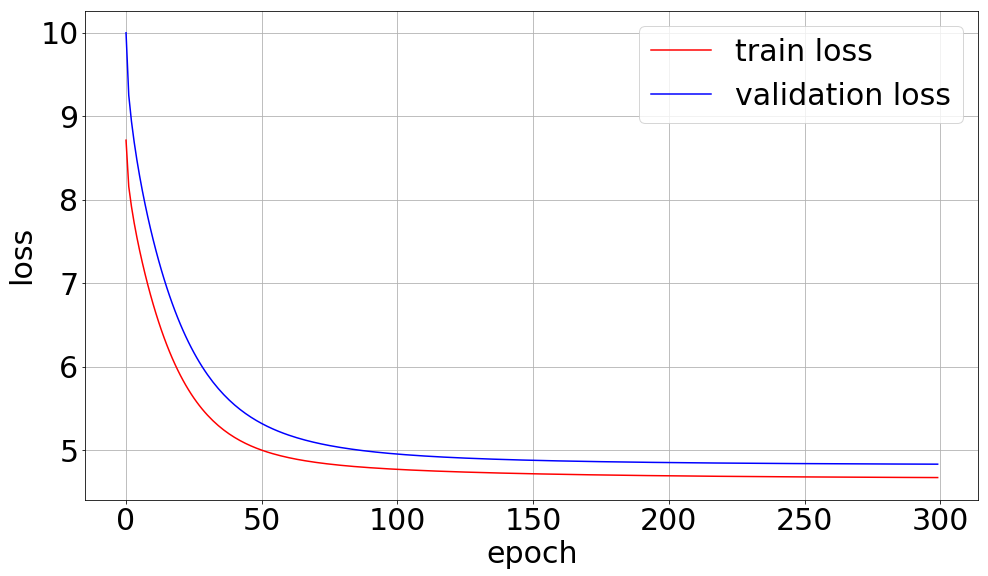

In [8]:
ftsize=30
plt.figure(figsize=(16, 9))
plt.xticks(fontsize=ftsize)
plt.yticks(fontsize=ftsize)
plt.plot(losses_train, "-", color="r", label="train loss")
plt.plot(losses_val, "-", color="b", label="validation loss")
plt.xlabel("epoch", fontsize=ftsize)
plt.ylabel("loss", fontsize=ftsize)
plt.legend(fontsize=ftsize)
# plt.title("The loss graph of GD solution")
plt.grid()
# plt.savefig('gd_loss.png')
plt.show()

## SGD solution

### Hyper-params

In [9]:
LEARNING_RATE = 0.00005
MAX_EPOCH = 300
PENALTY_FACTOR = 0.5

### Initial parameter $w$

In [10]:
w = np.zeros((n_features + 1, 1)) 

In [11]:
losses_train = []
losses_val = []

np.random.seed(int(time.time()))
train_size = X_train.shape[0]

for epoch in range(MAX_EPOCH):
    for i in range(train_size):
        rand = np.random.randint(0, train_size, size=1)
        X_rand, y_rand = X_train[rand], y_train[rand]
        grad = PENALTY_FACTOR * w + X_rand.T @ (X_rand @ w - y_rand)
        grad = -grad
        w = w + LEARNING_RATE * grad 

    y_pred = np.dot(X_train, w)
    loss_train = np.sqrt(((y_pred - y_train) ** 2).mean())
    losses_train.append(loss_train)

    y_pred = np.dot(X_val, w)
    loss_val = np.sqrt(((y_pred - y_val) ** 2).mean())
    losses_val.append(loss_val)

### Loss plot

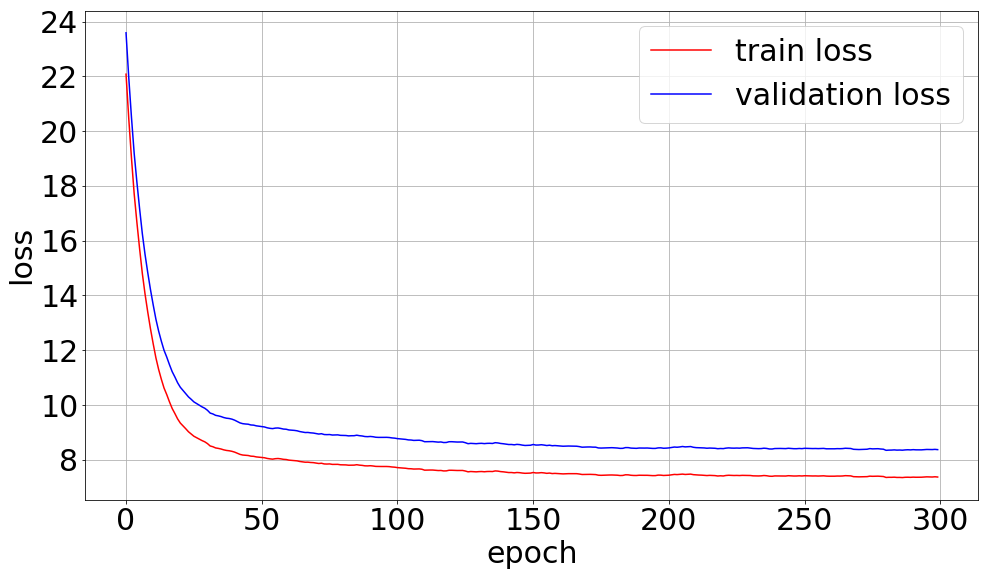

In [12]:
plt.figure(figsize=(16, 9))
plt.xticks(fontsize=ftsize)
plt.yticks(fontsize=ftsize)
plt.plot(losses_train, "-", color="r", label="train loss")
plt.plot(losses_val, "-", color="b", label="validation loss")
plt.xlabel("epoch", fontsize=ftsize)
plt.ylabel("loss", fontsize=ftsize)
plt.legend(fontsize=ftsize)
# plt.title("The loss graph of SGD solution")
plt.grid()
# plt.savefig('sgd_loss.png')
plt.show()